# Consensus convergence : Quenched network

In [7]:
from FastConsensusSolver import QuenchedSolver
import matplotlib.pyplot as plt
import numpy as np

#define the system
network_dict = {0: [1,2,3,4], 1: [0,2,3,4], 2: [1,0,3,4], 3: [1,2,0,4], 4: [1,2,3,0]}
influence_dict = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}
eta = 0.5
seed = 100

#define the solver with initial random state
cs = QuenchedSolver(network_dict, influence_dict, eta, seed)

In [8]:
#reach consensus
tol = 0.005
cs.reach_consensus(tol)

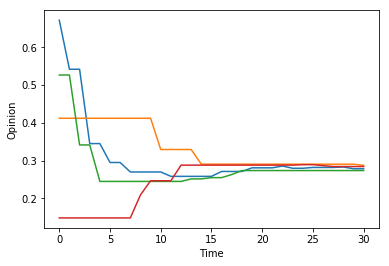

In [9]:
#get the raw data for temporal evolution of state
initial_state = cs.get_initial_state_vector()
history_vector = cs.get_history_vector()

#get the variation from the history and update state
node_vector = np.arange(0,4)
time_vector = np.arange(len(history_vector)+1)
temporal_state_dict = {node: [opinion] for node, opinion in zip(node_vector, initial_state)}
for t in time_vector[:-1]:
    for node, temporal_opinion_vector in temporal_state_dict.items():
        if history_vector[t][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[t][1])
        else:
            temporal_opinion_vector.append(temporal_opinion_vector[-1])

#draw the opinion of each node
for node in node_vector:
    plt.plot(time_vector, temporal_state_dict[node])
plt.xlabel(r"Time")
plt.ylabel(r"Opinion")
plt.show()

# Consensus convergence : Annealed network

In [16]:
from FastConsensusSolver import AnnealedSolver
import matplotlib.pyplot as plt
import numpy as np

#define the system
N = 10
priority_dict = {i : i for i in range(N)}
influence_dict = {i: 0.5 for i in range(N)}
eta = 0.5
seed = np.random.randint(0, 10**8)

#define the solver with initial random state
cs = AnnealedSolver(priority_dict, influence_dict, eta, seed)

In [17]:
#reach consensus
tol = 0.005
cs.reach_consensus(tol)

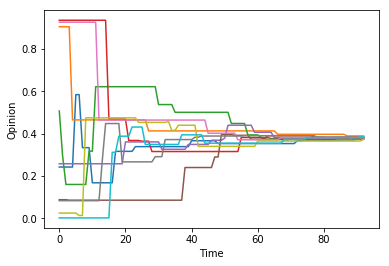

In [18]:
#get the raw data for temporal evolution of state
initial_state = cs.get_initial_state_vector()
history_vector = cs.get_history_vector()

#get the variation from the history and update state
node_vector = np.arange(0,N)
time_vector = np.arange(len(history_vector)+1)
temporal_state_dict = {node: [opinion] for node, opinion in zip(node_vector, initial_state)}
for t in time_vector[:-1]:
    for node, temporal_opinion_vector in temporal_state_dict.items():
        if history_vector[t][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[t][1])
        else:
            temporal_opinion_vector.append(temporal_opinion_vector[-1])

#draw the opinion of each node
for node in node_vector:
    plt.plot(time_vector, temporal_state_dict[node])
plt.xlabel(r"Time")
plt.ylabel(r"Opinion")
plt.show()

# Both agents speaks

Similarly to the deffuant model, we can allow for both agents to speak, or in other words, each event is a discussion and both agents change their opinion. Each step of the process is therefore
\begin{align}
    x_i = x_i + \eta (\alpha_i - \alpha_j + 1)(x_j - x_i) \; , \\
    x_j = x_j + \eta (\alpha_j - \alpha_i + 1)(x_i - x_j) \; .
\end{align}
This can be specified for both, annealed and quenched network solvers. It only requires to assign to True the keyword `both_peak`, which is False by default. Let us consider an example with the quenched case.

In [21]:
from FastConsensusSolver import QuenchedSolver
import matplotlib.pyplot as plt
import numpy as np

#define the system
network_dict = {0: [1,2,3,4], 1: [0,2,3,4], 2: [1,0,3,4], 3: [1,2,0,4], 4: [1,2,3,0]}
influence_dict = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5}
eta = 0.5
seed = 100

#define the solver with initial random state
cs = QuenchedSolver(network_dict, influence_dict, eta, seed, both_speak=True)

In [22]:
#reach consensus
tol = 0.001
cs.reach_consensus(tol)

To draw correctly the new states, one must take into account the fact that there are now two variations per time step.

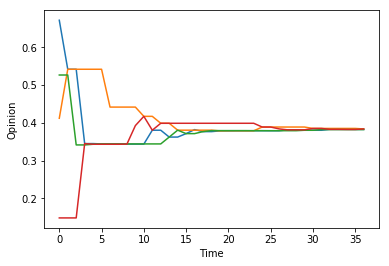

In [23]:
#get the raw data for temporal evolution of state
initial_state = cs.get_initial_state_vector()
history_vector = cs.get_history_vector()

#get the variation from the history and update state
node_vector = np.arange(0,4)
time_vector = np.arange(cs.get_time()+1)
temporal_state_dict = {node: [opinion] for node, opinion in zip(node_vector, initial_state)}
for t in time_vector[:-1]:
    for node, temporal_opinion_vector in temporal_state_dict.items():
        if history_vector[2*t][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[2*t][1])
        elif history_vector[2*t+1][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[2*t+1][1])
        else:
            temporal_opinion_vector.append(temporal_opinion_vector[-1])

#draw the opinion of each node
for node in node_vector:
    plt.plot(time_vector, temporal_state_dict[node])
plt.xlabel(r"Time")
plt.ylabel(r"Opinion")
plt.show()

# Bayesian update

A slightly different set of rules, based upon the Bayes (hehe), is available. The API for annealed and quenched network solvers are exactly the same as their non-Bayesian versions. An update (for a single speaker) now follow the following rules
\begin{align}
    k_{ji} &= \eta(1 + \alpha_j - \alpha_i) \times \frac{\sigma_i^2}{\sigma_i^2 + \sigma_j^2} \;, \\
    \sigma_i^2 &= (1-k_{ij})^2 \sigma_i^2 + k_{ij}^2 \sigma_j^2 \;, \\
    x_i &= x_i + k_{ij}(x_j - x_i) \;.
\end{align}
The term $\sigma_i^2$ is the variance on a agent opinion, representing its uncertainty, and $k_{ij}$ is a modified (scaled) Kalman gain.

In [25]:
from FastConsensusSolver import BayesianAnnealedSolver
import matplotlib.pyplot as plt
import numpy as np

#define the system
N = 10
priority_dict = {i : i for i in range(N)}
influence_dict = {i: 0.5 for i in range(N)}
eta = 0.5
seed = np.random.randint(0, 10**8)

#define the solver with initial random state
cs = BayesianAnnealedSolver(priority_dict, influence_dict, eta, seed)

In [26]:
#reach consensus
tol = 0.005
cs.reach_consensus(tol)

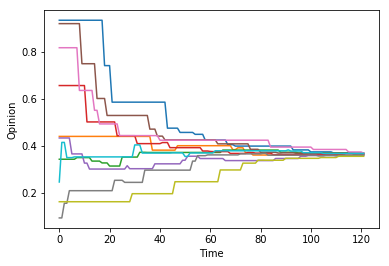

In [27]:
#get the raw data for temporal evolution of state
initial_state = cs.get_initial_state_vector()
history_vector = cs.get_history_vector()

#get the variation from the history and update state
node_vector = np.arange(0,N)
time_vector = np.arange(len(history_vector)+1)
temporal_state_dict = {node: [opinion] for node, opinion in zip(node_vector, initial_state)}
for t in time_vector[:-1]:
    for node, temporal_opinion_vector in temporal_state_dict.items():
        if history_vector[t][0] == node:
            temporal_opinion_vector.append(temporal_opinion_vector[-1]+history_vector[t][1])
        else:
            temporal_opinion_vector.append(temporal_opinion_vector[-1])

#draw the opinion of each node
for node in node_vector:
    plt.plot(time_vector, temporal_state_dict[node])
plt.xlabel(r"Time")
plt.ylabel(r"Opinion")
plt.show()